In [46]:
# Import
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE

In [3]:
# Read data
raw_data = pd.read_csv("data/creditcard.csv")

In [4]:
#Description
raw_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Data management

In [5]:
# Splitting data
X = raw_data.drop(['Class'], axis=1)
X.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [6]:
# Standardization
sc = StandardScaler()
X = sc.fit_transform(X)

In [7]:
# Output
Y = raw_data['Class']

In [8]:
#Percentage of fraud
fraud_percentage = Y[Y == 1].count() / Y.count() * 100
print(fraud_percentage)

0.1727485630620034


In [34]:
normal_transaction = X[raw_data['Class'] == 0]
abnormal_transaction = X[raw_data['Class'] == 1]

In [33]:
print(len(normal_transaction))
print(len(abnormal_transaction))

284315
492


# OVERSAMPLING

# First solution
DNN

In [92]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

(array([227452.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 227452.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

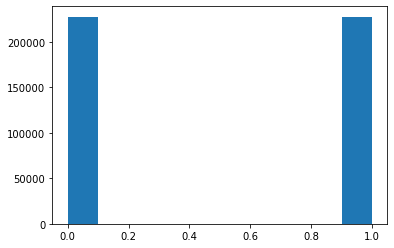

In [93]:
# Oversampling the dataset
overSampling = SMOTE()
x_train_over_samp, y_train_over_samp = overSampling.fit_sample(X_train, y_train)

plt.figure()
plt.hist(y_train_over_samp)

In [94]:
# Metrics
metrics = [
    tf.keras.metrics.Accuracy(name="Accuracy"),
    tf.keras.metrics.Precision(name="Precision"),
    tf.keras.metrics.Recall(name="Recall")]

In [95]:
# Build model
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=128, activation='relu', input_shape=[30]),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(units=32, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(units=16, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(units=1, activation='sigmoid')  
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=metrics)

In [96]:
# model fitting
history = model.fit(x_train_over_samp, y_train_over_samp,
                    epochs=20, batch_size=128,
                    validation_data=(X_test, y_test))

Train on 454904 samples, validate on 56962 samples
Epoch 1/20
454904/454904 [==============================] - 10s 21us/sample - loss: 0.0315 - Accuracy: 0.2019 - Precision: 0.9887 - Recall: 0.9910 - val_loss: 0.0136 - val_Accuracy: 0.0299 - val_Precision: 0.4320 - val_Recall: 0.8990
Epoch 2/20
454904/454904 [==============================] - 8s 17us/sample - loss: 0.0074 - Accuracy: 0.1987 - Precision: 0.9976 - Recall: 0.9989 - val_loss: 0.0137 - val_Accuracy: 0.1435 - val_Precision: 0.5822 - val_Recall: 0.8586
Epoch 3/20
454904/454904 [==============================] - 10s 22us/sample - loss: 0.0056 - Accuracy: 0.2409 - Precision: 0.9982 - Recall: 0.9992 - val_loss: 0.0138 - val_Accuracy: 0.2178 - val_Precision: 0.6043 - val_Recall: 0.8485
Epoch 4/20
454904/454904 [==============================] - 8s 17us/sample - loss: 0.0046 - Accuracy: 0.2706 - Precision: 0.9986 - Recall: 0.9994 - val_loss: 0.0132 - val_Accuracy: 0.2657 - val_Precision: 0.6565 - val_Recall: 0.8687
Epoch 5/20
4549

In [97]:
# Prediction
y_pred = model.predict(X_test)
y_pred_class = y_pred > 0.5

In [98]:
# Confusion Matrix
%precision 2
np.set_printoptions(suppress=True)
confusion_matrix(y_test, y_pred_class, normalize='true')*100

array([[99.94,  0.06],
       [14.14, 85.86]])

In [99]:
# Metrics
score = precision_recall_fscore_support(y_test, y_pred_class)
print('Precision:', format(score[0][1], '.3f'))
print('Recall:', format(score[1][1], '.3f'))
print('F1:', format(score[2][1], '.3f'))

Precision: 0.720
Recall: 0.859
F1: 0.783


Text(0.5, 1.0, 'Training and validation Precision')

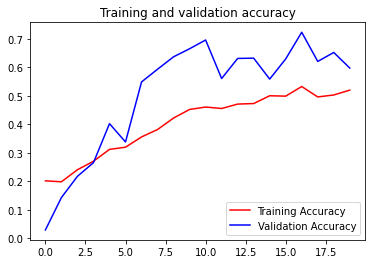

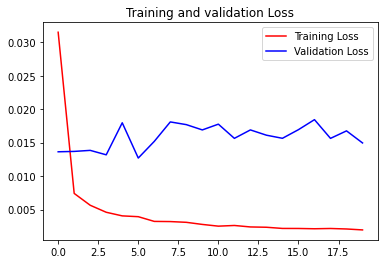

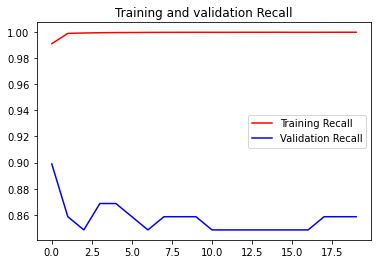

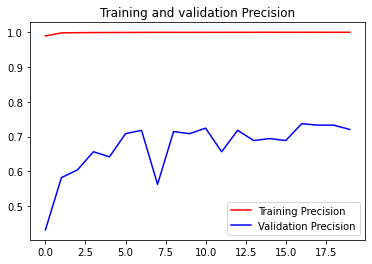

In [100]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['Accuracy']
val_acc=history.history['val_Accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
rec=history.history['Recall']
val_rec=history.history['val_Recall']
prec=history.history['Precision']
val_prec=history.history['val_Precision']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure()
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.legend(["Training Accuracy", "Validation Accuracy"])
plt.title('Training and validation accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.figure()
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.legend(["Training Loss", "Validation Loss"])
plt.title('Training and validation Loss')

#------------------------------------------------
# Plot training and validation Recall per epoch
#------------------------------------------------
plt.figure()
plt.plot(epochs, rec, 'r')
plt.plot(epochs, val_rec, 'b')
plt.title('Training and validation recall')
plt.legend(["Training Recall", "Validation Recall"])
plt.title('Training and validation Recall')

#------------------------------------------------
# Plot training and validation Precision per epoch
#------------------------------------------------
plt.figure()
plt.plot(epochs, prec, 'r')
plt.plot(epochs, val_prec, 'b')
plt.title('Training and validation Precision')
plt.legend(["Training Precision", "Validation Precision"])
plt.title('Training and validation Precision')

# Second solution
Auto-encoder

In [35]:
# Train-Test split
train_normal_transa, test_normal_transa, _, _ = train_test_split(normal_transaction, normal_transaction, test_size = 0.2)

In [36]:
# Build model
encoder = tf.keras.models.Sequential([
          tf.keras.layers.Dense(units=20, activation='relu', input_shape=[30]),
          tf.keras.layers.Dense(units=10, activation='relu'),
])
decoder = tf.keras.models.Sequential([
          tf.keras.layers.Dense(units=20, activation='relu', input_shape=[10]),
          tf.keras.layers.Dense(units=30, activation='relu'),
])

autoencoder = tf.keras.models.Sequential([encoder, decoder])

autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [37]:
# model fitting
history_ae = autoencoder.fit(train_normal_transa, train_normal_transa,
                          epochs=20,
                          validation_data=(test_normal_transa, test_normal_transa))

Train on 227452 samples, validate on 56863 samples
Epoch 1/20
227452/227452 [==============================] - 12s 51us/sample - loss: 0.7902 - accuracy: 0.2876 - val_loss: 0.7259 - val_accuracy: 0.3591
Epoch 2/20
227452/227452 [==============================] - 11s 47us/sample - loss: 0.7315 - accuracy: 0.3897 - val_loss: 0.7091 - val_accuracy: 0.4092
Epoch 3/20
227452/227452 [==============================] - 11s 50us/sample - loss: 0.7155 - accuracy: 0.4151 - val_loss: 0.6959 - val_accuracy: 0.4276
Epoch 4/20
227452/227452 [==============================] - 12s 53us/sample - loss: 0.7047 - accuracy: 0.4315 - val_loss: 0.6902 - val_accuracy: 0.4449
Epoch 5/20
227452/227452 [==============================] - 11s 50us/sample - loss: 0.6987 - accuracy: 0.4461 - val_loss: 0.6869 - val_accuracy: 0.4587
Epoch 6/20
227452/227452 [==============================] - 13s 56us/sample - loss: 0.6945 - accuracy: 0.4514 - val_loss: 0.6823 - val_accuracy: 0.4554
Epoch 7/20
227452/227452 [===========

Text(0.5, 1.0, 'Training and validation Loss')

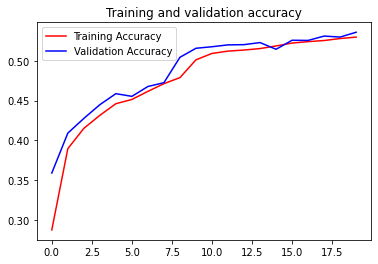

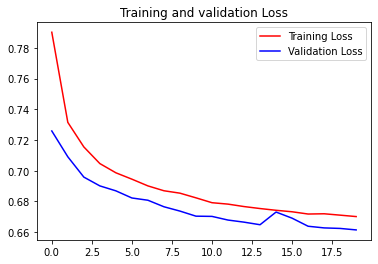

In [39]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history_ae.history['accuracy']
val_acc=history_ae.history['val_accuracy']
loss=history_ae.history['loss']
val_loss=history_ae.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure()
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.legend(["Training Accuracy", "Validation Accuracy"])
plt.title('Training and validation accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.figure()
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.legend(["Training Loss", "Validation Loss"])
plt.title('Training and validation Loss')

In [41]:
# Prediction
train_predict = autoencoder.predict(train_normal_transa)
test_predict = autoencoder.predict(test_normal_transa)
fraud_predict = autoencoder.predict(abnormal_transaction)

In [43]:
mse_train = np.sum(np.power(train_normal_transa - train_predict, 2), axis=1)
mse_test = np.sum(np.power(test_normal_transa - test_predict, 2), axis=1)
mse_fraud = np.sum(np.power(abnormal_transaction - fraud_predict, 2), axis=1)

C:\Users\Tom\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Tom\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Tom\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

<AxesSubplot:ylabel='Density'>

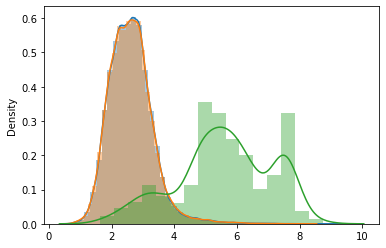

In [60]:
#plt.hist(np.log(mse_train), density=True)
#plt.hist(np.log(mse_test), density=True)
#plt.hist(np.log(mse_fraud), density=True)

fig, ax = plt.subplots()
sns.distplot(np.log(mse_train), norm_hist=True, ax=ax)
sns.distplot(np.log(mse_test), norm_hist=True, ax=ax)
sns.distplot(np.log(mse_fraud), norm_hist=True, ax=ax)


In [45]:
print(np.mean(mse_train))
print(np.mean(mse_test))
print(np.mean(mse_fraud))

20.080747418376152
19.845001950978997
651.2307232121184


In [89]:
#prediction
discriminative_threshold = 4.1
error = np.sum(np.power(X - autoencoder.predict(X), 2), axis=1)
detect_abnormal = np.log(error) > discriminative_threshold

In [90]:
# Confusion Matrix
%precision 2
np.set_printoptions(suppress=True)
confusion_matrix(Y, detect_abnormal, normalize='true')*100

array([[99.27,  0.73],
       [35.57, 64.43]])

In [91]:
# Metrics
score = precision_recall_fscore_support(Y, detect_abnormal)
print('Precision:', format(score[0][1], '.3f'))
print('Recall:', format(score[1][1], '.3f'))
print('F1:', format(score[2][1], '.3f'))

Precision: 0.133
Recall: 0.644
F1: 0.221
